In [1]:
import csv
import sys
import os 
import glob 
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np 
import re

# define the necessary functions

In [2]:
def read_csv_skip_header(file_path):
    data = []
    
    # Open the CSV file
    with open(file_path, mode='r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        
        # Skip the header row
        next(csv_reader)
        
        # Read the remaining rows
        for row in csv_reader:
            data.append(row)
    
    return data

def get_files_with_extension(directory, extension):
    # Ensure the extension starts with a dot
    if not extension.startswith('.'):
        extension = '.' + extension
    
    # Get all files with the given extension in the directory
    files = glob.glob(os.path.join(directory, '*' + extension))
    
    # Extract the file names from the paths
    file_names = [os.path.basename(file) for file in files]
    
    return file_names

def import_sim_data(file_names,folder_name):
    top_monitor = []
    bottom_monitor = []
    for file_name in file_names:
        data = read_csv_skip_header(folder_name+file_name)
        transposed_data = list(zip(*data))
        top_monitor.append(transposed_data[1])
        bottom_monitor.append(transposed_data[2])
    top_monitor = np.array(top_monitor)
    bottom_monitor = np.array(bottom_monitor)

    # convert string array to float array 
    freqs = np.array(transposed_data[0])
    freqs_THz = np.zeros(len(freqs))
    for i in range(len(freqs)):
        freqs_THz[i] = float(freqs[i])/(1e12)
    top_monitor_array = np.asarray(top_monitor,dtype=float)
    bottom_monitor_array = np.asarray(bottom_monitor,dtype=float)
    return freqs_THz, top_monitor_array, bottom_monitor_array

In [3]:
# get all the data files 
directory_path = "./data_2/"
extension = 'csv'
file_names = get_files_with_extension(directory_path, extension)
print(file_names)

['nanopillar_diameter_520nm.csv', 'nanopillar_diameter_400nm.csv', 'nanopillar_diameter_440nm.csv', 'nanopillar_diameter_480nm.csv', 'nanopillar_diameter_560nm.csv', 'nanopillar_diameter_200nm.csv', 'nanopillar_diameter_320nm.csv', 'nanopillar_diameter_360nm.csv', 'nanopillar_diameter_280nm.csv', 'nanopillar_diameter_240nm.csv']


In [3]:
path_1 = "./data/"
path_2 = "./data_2/"
path_3 = "./bulkSilicon_data_1/"
path_4 = "./bulkSilicon_data_2/"
extension = 'csv'
file_names_1 = get_files_with_extension(path_1, extension)
file_names_2 = get_files_with_extension(path_2, extension)
file_names_3 = get_files_with_extension(path_3, extension)
file_names_4 = get_files_with_extension(path_4, extension)

freqs_THz, top_monitor_array, bottom_monitor_array = import_sim_data(file_names_1,path_1)
freqs_THz_2, top_monitor_array_2, bottom_monitor_array_2 = import_sim_data(file_names_2,path_2)
freqs_THz_3, top_monitor_array_3, bottom_monitor_array_3 = import_sim_data(file_names_3,path_3)
freqs_THz_4, top_monitor_array_4, bottom_monitor_array_4 = import_sim_data(file_names_4,path_4)


# plot the flux monitor output at various frequencies for different designs 

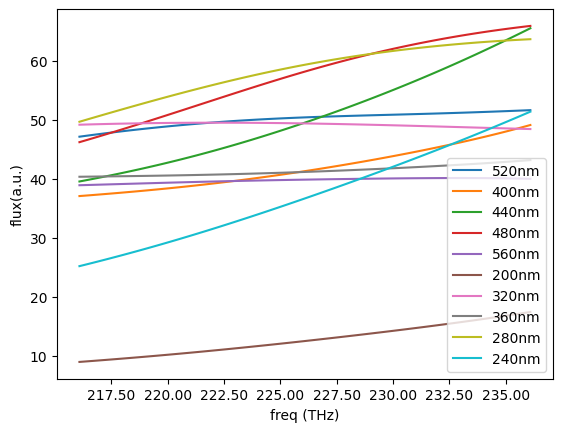

In [6]:
fig, ax = plt.subplots()
def format_func(value, tick_number):
    # Convert value to string with specific format (e.g., two decimal places)
    return f'{value:.2f}'
ax.xaxis.set_major_formatter(FuncFormatter(format_func))
for i in range(len(file_names_4)):
    plot_legend = file_names_4[i][-9:-4]
    ax.plot(freqs_THz_4,top_monitor_array_4[i],label=plot_legend)
ax.set_ylabel('flux(a.u.)')
ax.set_xlabel('freq (THz)')
ax.legend()


226.1888366470131


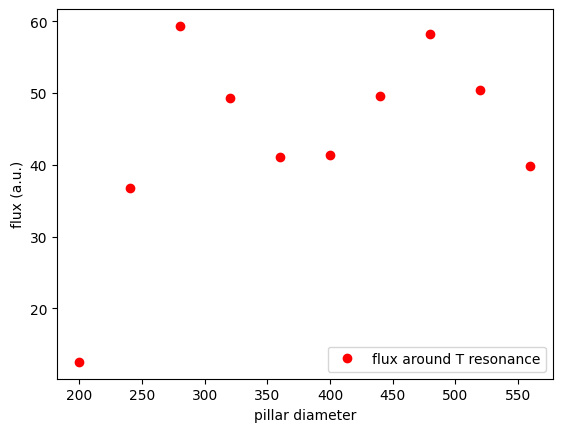

In [7]:
flux_monitor_resonance = []
pillar_diameters = []
for i in range(len(file_names_4)):
    pillar_diameters.append(file_names_4[i][-9:-6])
    flux_monitor_resonance.append(top_monitor_array_4[i][50])
pillar_diameters_array = np.asarray(pillar_diameters,dtype=float)
print(freqs_THz[50])
plt.plot(pillar_diameters_array,flux_monitor_resonance,'ro',label='flux around T resonance')
plt.xlabel('pillar diameter')
plt.ylabel('flux (a.u.)')
plt.legend()

226.1888366470131


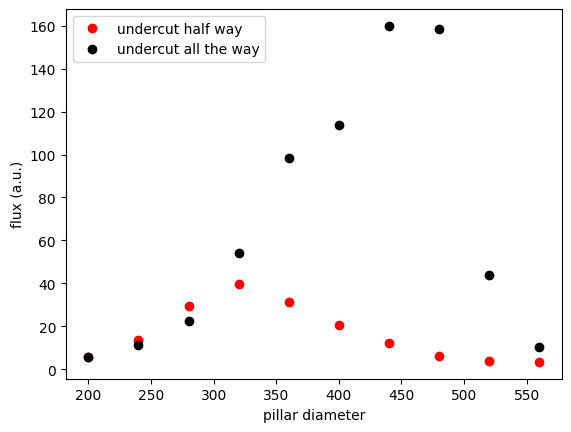

In [8]:
flux_monitor_resonance_1 = []
flux_monitor_resonance_2 = []
flux_monitor_resonance_3 = []
flux_monitor_resonance_4 = []

pillar_diameters = []
for i in range(len(file_names_1)):
    pillar_diameters.append(file_names_1[i][-9:-6])
    flux_monitor_resonance_1.append(top_monitor_array[i][50])
    flux_monitor_resonance_2.append(top_monitor_array_2[i][50])
    flux_monitor_resonance_3.append(top_monitor_array_3[i][50])
    flux_monitor_resonance_4.append(top_monitor_array_4[i][50])
pillar_diameters_array = np.asarray(pillar_diameters,dtype=float)
print(freqs_THz[50])
plt.plot(pillar_diameters_array,flux_monitor_resonance_1,'ro',label='undercut half way (SOI)')
plt.plot(pillar_diameters_array,flux_monitor_resonance_2,'ko',label='undercut all the way (SOI)')

plt.xlabel('pillar diameter')
plt.ylabel('flux (a.u.)')
plt.legend()